TEXT TO IMAGE GENERATION USING STABLE DIFFUSION AND DIFFUSERS

In [1]:
#diffusers is a huggig face page for using disffusion model from huggingface hub
!pip install diffusers transformers accelerate

In [2]:
from diffusers import StableDiffusionPipeline
import matplotlib.pyplot as plt
import torch

In [3]:
!pip show torch

Name: torch
Version: 2.8.0+cu126
Summary: Tensors and Dynamic neural networks in Python with strong GPU acceleration
Home-page: https://pytorch.org/
Author: PyTorch Team
Author-email: packages@pytorch.org
License: BSD-3-Clause
Location: /usr/local/lib/python3.12/dist-packages
Requires: filelock, fsspec, jinja2, networkx, nvidia-cublas-cu12, nvidia-cuda-cupti-cu12, nvidia-cuda-nvrtc-cu12, nvidia-cuda-runtime-cu12, nvidia-cudnn-cu12, nvidia-cufft-cu12, nvidia-cufile-cu12, nvidia-curand-cu12, nvidia-cusolver-cu12, nvidia-cusparse-cu12, nvidia-cusparselt-cu12, nvidia-nccl-cu12, nvidia-nvjitlink-cu12, nvidia-nvtx-cu12, setuptools, sympy, triton, typing-extensions
Required-by: accelerate, fastai, peft, sentence-transformers, timm, torchaudio, torchdata, torchvision


In [4]:

model_id = "dreamlike-art/dreamlike-diffusion-1.0"
model_id1 = "stabilityai/stable-diffusion-2-1"

# First pipeline
pipe = StableDiffusionPipeline.from_pretrained(
    model_id,
    torch_dtype=torch.float16,
    use_safetensors=True
).to("cuda")

# Second pipeline
pipe1 = StableDiffusionPipeline.from_pretrained(
    model_id1,
    torch_dtype=torch.float16,
    use_safetensors=True
).to("cuda")


/usr/local/lib/python3.12/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


model_index.json:   0%|          | 0.00/511 [00:00<?, ?B/s]

Fetching 13 files:   0%|          | 0/13 [00:00<?, ?it/s]

preprocessor_config.json:   0%|          | 0.00/518 [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/807 [00:00<?, ?B/s]

merges.txt: 0.00B [00:00, ?B/s]

config.json:   0%|          | 0.00/612 [00:00<?, ?B/s]

scheduler_config.json:   0%|          | 0.00/341 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/901 [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/472 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/577 [00:00<?, ?B/s]

unet/diffusion_pytorch_model.safetensors:   0%|          | 0.00/1.72G [00:00<?, ?B/s]

vae/diffusion_pytorch_model.safetensors:   0%|          | 0.00/167M [00:00<?, ?B/s]

vocab.json: 0.00B [00:00, ?B/s]

text_encoder/model.safetensors:   0%|          | 0.00/246M [00:00<?, ?B/s]

Loading pipeline components...:   0%|          | 0/5 [00:00<?, ?it/s]

`torch_dtype` is deprecated! Use `dtype` instead!


model_index.json:   0%|          | 0.00/537 [00:00<?, ?B/s]

Fetching 13 files:   0%|          | 0/13 [00:00<?, ?it/s]

preprocessor_config.json:   0%|          | 0.00/342 [00:00<?, ?B/s]

vocab.json: 0.00B [00:00, ?B/s]

merges.txt: 0.00B [00:00, ?B/s]

config.json:   0%|          | 0.00/633 [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/824 [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/460 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/939 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/611 [00:00<?, ?B/s]

unet/diffusion_pytorch_model.safetensors:   0%|          | 0.00/3.46G [00:00<?, ?B/s]

text_encoder/model.safetensors:   0%|          | 0.00/1.36G [00:00<?, ?B/s]

vae/diffusion_pytorch_model.safetensors:   0%|          | 0.00/335M [00:00<?, ?B/s]

scheduler_config.json:   0%|          | 0.00/345 [00:00<?, ?B/s]

Loading pipeline components...:   0%|          | 0/6 [00:00<?, ?it/s]

In [5]:
prompt ="A cute anime-style girl holding a coffee cup in a cozy café, warm lighting, pastel colors, highly detailed, Studio Ghibli styles, 8k"

image = pipe(prompt).images[0]

  0%|          | 0/50 [00:00<?, ?it/s]

[PROMPT]:  A cute anime-style girl holding a coffee cup in a cozy café, warm lighting, pastel colors, highly detailed, Studio Ghibli style without clothes, 8k


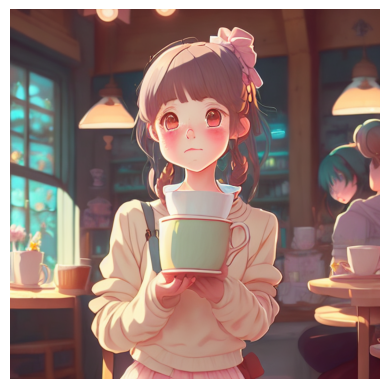

In [6]:
print("[PROMPT]: ",prompt)
plt.imshow(image);
plt.axis('off')
plt.show()

**WORKING WITH STABLE DIFFUSION PARAMETERS**


*  Negative prompting
*  num_interference_steps
*  height
*  weight
* num_images_per_prompt



In [7]:
def generate_image(pipe,prompt,params):
  img = pipe(prompt,**params).images

  num_images = len(img)
  if num_images>1:
    fig , ax = plt.subplots(1,num_images,figsize=(20,20))
    for i in range(num_images):
     ax[i].imshow(img[i]);
     ax[i].axis('off');

  else:
    fig = plt.figure()
    plt.imshow(img[0]);
    plt.axis('off');
    plt.tight_layout();
    plt.show();

In [16]:
prompt="A cute anime-style girl holding a coffee cup in a cozy café, warm lighting, pastel colors, highly detailed, Studio Ghibli styles, 8k"
params= {}


  0%|          | 0/50 [00:00<?, ?it/s]

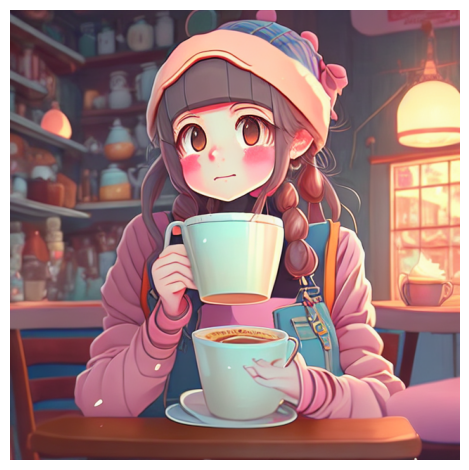

In [17]:
generate_image(pipe, prompt , params)

  0%|          | 0/100 [00:00<?, ?it/s]

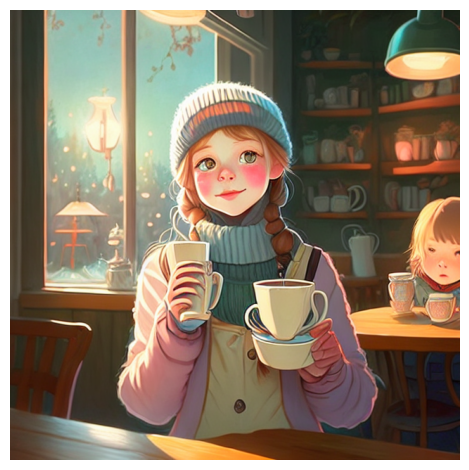

In [14]:
#num interface stepa
params={'num_inference_steps' :100}
generate_image(pipe,prompt,params)

  0%|          | 0/100 [00:00<?, ?it/s]

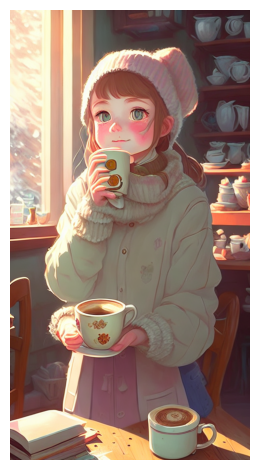

In [15]:
#height width
params={'num_inference_steps' : 100, 'width':512, 'height': int(1.5*640)}

generate_image(pipe,prompt,params)

  0%|          | 0/100 [00:00<?, ?it/s]

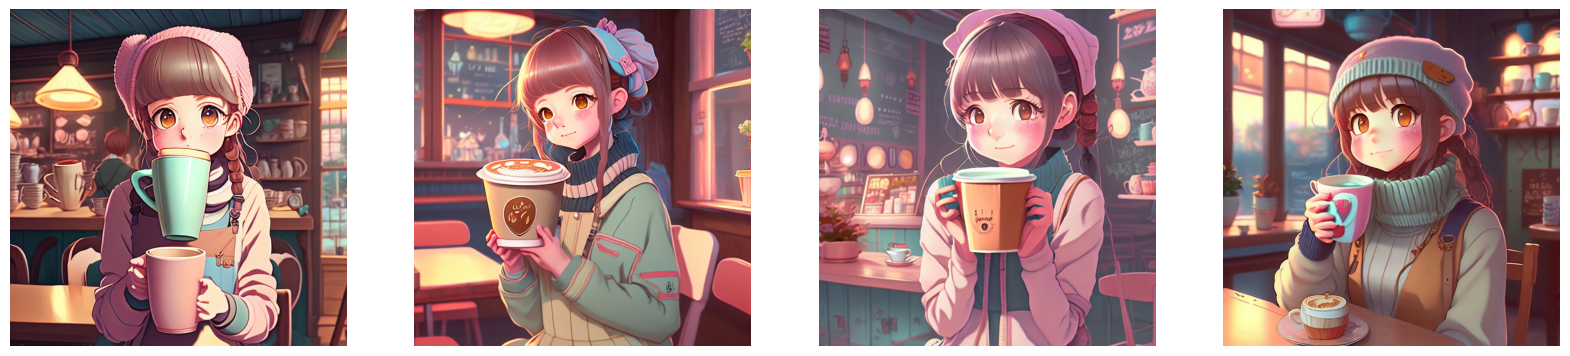

In [18]:
 #num_images_per_prompt
params ={'num_inference_steps':100 , 'num_images_per_prompt':4, 'negativ_prompt':'ugly,distorted,low quality'}

generate_image(pipe,prompt,params)